<a href="https://colab.research.google.com/github/vinnymurphy/covid/blob/master/notebook/states_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Percent Death')

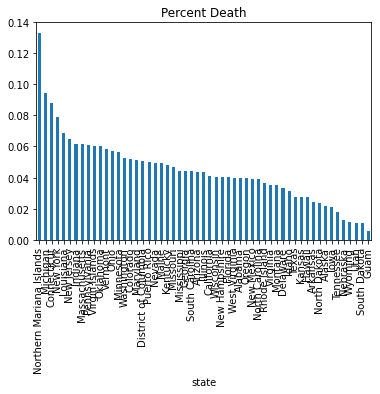

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'


states = pd.read_csv(url)
state_total = states.groupby('state').max()
state_total = state_total.drop(columns=['fips'])
state_total['percent'] = state_total['deaths'] / state_total['cases']
state_total.sort_values(by='percent', inplace=True, ascending=False)
fig = state_total['percent'].plot(kind='bar')
fig.set_title('Percent Death')


In [3]:
state_total.head(11)

,date,cases,deaths,percent
state,,,,
Northern Mariana Islands,2020-05-06,15,2,0.133333
Michigan,2020-05-06,45048,4250,0.094344
Connecticut,2020-05-06,30995,2718,0.087692
New York,2020-05-06,329405,25956,0.078797
Louisiana,2020-05-06,30399,2094,0.068884
New Jersey,2020-05-06,131890,8549,0.064819
Indiana,2020-05-06,22286,1377,0.061788
Massachusetts,2020-05-06,72025,4420,0.061368
Pennsylvania,2020-05-06,54989,3360,0.061103


In [4]:

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
counties = pd.read_csv(url)
mass = counties[counties['state'] == 'Massachusetts']
mass = mass.drop(columns=['fips'])
mass['percent'] = mass['deaths'] / mass['cases'] 
mass.tail(15).T





,119296,119297,119298,119299,119300,119301,119302,119303,119304,119305,119306,119307,119308,119309,119310
date,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06,2020-05-06
county,Barnstable,Berkshire,Bristol,Dukes,Essex,Franklin,Hampden,Hampshire,Middlesex,Nantucket,Norfolk,Plymouth,Suffolk,Unknown,Worcester
state,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts
cases,997,461,4380,22,10344,278,4321,580,16327,12,6610,5899,14476,326,6992
deaths,55,37,223,1,561,38,425,47,1070,0,596,357,642,3,365
percent,0.0551655,0.0802603,0.0509132,0.0454545,0.0542343,0.136691,0.0983569,0.0810345,0.0655356,0,0.0901664,0.0605187,0.0443493,0.00920245,0.0522025


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

def county_info(name, column):
  return mass[mass['county'] == name][column]

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Suffolk	Unknown	Worcester
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=('Bristol', 'Unknown', 'Plymouth', 'Middlesex', 'Barnstable', 'Worcester')) 

fig.append_trace(go.Scatter(
    x=county_info('Bristol', 'date'),
    y=county_info('Bristol', 'cases'),
    mode='lines+markers',
    name='Bristol',

), row=1, col=1)
fig.append_trace(go.Scatter(
    x=county_info('Unknown', 'date'),
    y=county_info('Unknown', 'cases'),
    mode='lines+markers',
    name='Unknown',

), row=1, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Plymouth', 'date'),
    y=county_info('Plymouth', 'cases'),
    mode='lines+markers',
    name='Plymouth',

), row=2, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Middlesex', 'date'),
    y=county_info('Middlesex', 'cases'),
    mode='lines+markers',
    name='Middlesex',

), row=2, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Barnstable', 'date'),
    y=county_info('Barnstable', 'cases'),
    mode='lines+markers',
    name='Barnstable',
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Worcester', 'date'),
    y=county_info('Worcester', 'cases'),
    mode='lines+markers',
    name='Worcester',
), row=3, col=2)

fig.update_layout(height=600, width=600, title_text="County Cases")
fig.show()